In [1]:
stopword_set = set()

In [2]:
    with open("D:/AI/第4课/wikiextractor-master/wikiextractor-master/zhwiki/AA/stopwords.txt", 'r', encoding="utf-8") as stopwords:
        for stopword in stopwords:
            stopword_set.add(stopword.strip("\n"))

In [3]:
stopword_set

{'［①②］',
 '［②①］',
 '［①⑥］',
 '互',
 '为',
 '可好',
 '儿',
 '不特',
 '得出',
 '出于',
 '︿',
 '反而',
 '内',
 '趁便',
 '因着',
 '－－',
 'ｆ］',
 '—',
 '故而',
 '依据',
 '平素',
 '长期以来',
 '＜±',
 '近几年来',
 '几经',
 '......',
 '呜',
 '按说',
 '动辄',
 '哎呀',
 '前后',
 '方面',
 '普遍',
 '千万',
 '单单',
 '却',
 '当中',
 '有所',
 '其',
 '以及',
 '何必',
 '连连',
 '那么些',
 '［③ｄ］',
 '4',
 '凡是',
 '每逢',
 '密切',
 '［③①］',
 '蛮',
 '若夫',
 '恰逢',
 '反倒是',
 '的确',
 '③',
 '欢迎',
 '.数',
 '遇到',
 '掌握',
 '切莫',
 '加以',
 '这么些',
 '只有',
 '每每',
 '倘若',
 './',
 '从',
 '举凡',
 '呼啦',
 '一次',
 '常常',
 '好的',
 '进而',
 '嘻',
 '9',
 '借此',
 '到目前为止',
 '何况',
 '除此',
 '·',
 '逢',
 '至今',
 '一片',
 '哎哟',
 '地',
 '深入',
 '率然',
 '不可',
 '需要',
 '吧哒',
 '由',
 '由是',
 '取道',
 '再者说',
 '反过来',
 '这样',
 '亲身',
 '别的',
 '啥',
 '策略地',
 '方便',
 '截然',
 '２',
 '白白',
 '屡屡',
 '急匆匆',
 '即如',
 '然则',
 '独',
 '三番两次',
 '■',
 '到了儿',
 '距',
 '为着',
 '挨着',
 '极了',
 '自个儿',
 '几乎',
 '来看',
 '注意',
 '时候',
 '他',
 '哪样',
 '联系',
 '结合',
 '迅速',
 '伟大',
 '虽然',
 '其余',
 '哗',
 '重要',
 '么',
 '造成',
 '长话短说',
 '哪里',
 '挨门逐户',
 '别是',
 '起见',
 '莫',
 '」',
 '切不可',
 '］［'

In [4]:
import os

In [5]:
save_path = "D:/AI/第4课/wikiextractor-master/wikiextractor-master/zhwiki/AA/"

In [6]:
[os.path.join(save_path, "wiki_corpus0%s" % str(i)) for i in range(3)]

['D:/AI/第4课/wikiextractor-master/wikiextractor-master/zhwiki/AA/wiki_corpus00',
 'D:/AI/第4课/wikiextractor-master/wikiextractor-master/zhwiki/AA/wiki_corpus01',
 'D:/AI/第4课/wikiextractor-master/wikiextractor-master/zhwiki/AA/wiki_corpus02']

In [7]:
import logging,jieba,os,re

In [8]:
def get_stopwords():
    logging.basicConfig(format='%(asctime)s:%(levelname)s:%(message)s',level=logging.INFO)
    #加载停用词表
    stopword_set = set()
    with open("D:/AI/第4课/wikiextractor-master/wikiextractor-master/zhwiki/AA/stopwords.txt",'r',encoding="utf-8") as stopwords:
        for stopword in stopwords:
            stopword_set.add(stopword.strip("\n"))
    return stopword_set

# 使用正则表达式解析文本1

In [9]:
def parse_zhwiki(read_file_path,save_file_path):
    #过滤掉<doc>
    regex_str = "[^<doc.*>$]|[^</doc>$]"
    file = open(read_file_path,"r",encoding="utf-8")
    #写文件
    output = open(save_file_path,"w+",encoding="utf-8")
    content_line = file.readline()
    #获取停用词表
    stopwords = get_stopwords()
     #定义一个字符串变量，表示一篇文章的分词结果
    article_contents = ""
    while content_line:
        match_obj = re.match(regex_str,content_line)
        content_line = content_line.strip("\n")
        if len(content_line) > 0:
            if match_obj:
                #使用jieba进行分词
                words = jieba.cut(content_line,cut_all=False)
                for word in words:
                    if word not in stopwords:
                        article_contents += word+" "
            else:
                if len(article_contents) > 0:
                    output.write(article_contents+"\n")
                    article_contents = ""
        content_line = file.readline()
    output.close()


In [10]:
'''
将维基百科语料库进行分类
'''
def generate_corpus():
    zhwiki_path = "D:/AI/第4课/wikiextractor-master/wikiextractor-master/zhwiki/AA"
    save_path = "D:/AI/第4课/wikiextractor-master/wikiextractor-master/zhwiki/AA"
    for i in range(3):
        file_path = os.path.join(zhwiki_path,str("wiki_zh_0%s"%str(i)))
        parse_zhwiki(file_path,os.path.join(save_path,"wiki_corpus0%s"%str(i)))

In [11]:
generate_corpus()

Building prefix dict from the default dictionary ...
2019-07-31 17:52:52,612:DEBUG:Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\C00495~1\AppData\Local\Temp\jieba.cache
2019-07-31 17:52:52,633:DEBUG:Loading model from cache C:\Users\C00495~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.851 seconds.
2019-07-31 17:52:53,481:DEBUG:Loading model cost 0.851 seconds.
Prefix dict has been built succesfully.
2019-07-31 17:52:53,482:DEBUG:Prefix dict has been built succesfully.


KeyboardInterrupt: 

In [ ]:
'''
合并分词后的文件
'''
def merge_corpus():
    output = open("D:/AI/第4课/wikiextractor-master/wikiextractor-master/zhwiki/AA/wiki_corpus","w",encoding="utf-8")
    input = "D:/AI/第4课/wikiextractor-master/wikiextractor-master/zhwiki/AA"
    for i in range(3):
        file_path = os.path.join(input,str("wiki_corpus0%s"%str(i)))
        file = open(file_path,"r",encoding="utf-8")
        line = file.readline()
        while line:
            output.writelines(line)
            line = file.readline()
        file.close()
    output.close()

In [ ]:
merge_corpus()

In [ ]:
!python -m pip install --upgrade pip

In [ ]:
import logging
from gensim.models import word2vec
 
def main():
    logging.basicConfig(format="%(asctime)s:%(levelname)s:%(message)s",level=logging.INFO)
    sentences = word2vec.LineSentence("D:/AI/第4课/wikiextractor-master/wikiextractor-master/zhwiki/AA/wiki_corpus")
    model = word2vec.Word2Vec(sentences,size=250)
    #保存模型
    model.save("D:/AI/第4课/wikiextractor-master/wikiextractor-master/zhwiki/AA/model/wiki_corpus.model")

In [ ]:
main()

In [12]:
import logging

In [13]:
from gensim import models

2019-07-31 17:56:17,361:INFO:'pattern' package not found; tag filters are not available for English


In [14]:
import numpy as np

In [15]:
import matplotlib.pyplot as plt

In [16]:
!pip install wordcloud

In [17]:
from wordcloud import WordCloud

In [68]:
font = r'C:\Windows\Fonts\simhei.ttf'

'''
round marks
'''

In [69]:
def get_mask():
    x, y = np.ogrid[:300, :300]
    mask = (x-150) ** 2 + (y-150) ** 2 > 130 **2
    mask = 255 * mask.astype(int)
    return mask

In [70]:
get_mask()

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

# '''绘制词云'''

In [73]:
def draw_word_cloud(word_cloud):
    wc = WordCloud(background_color="white", mask=get_mask(), font_path=font)  # 
    wc.generate_from_frequencies(word_cloud)
    #隐藏x轴和y轴
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")  # , interpolation="bilinear"
    plt.show()

In [74]:
def test():
    logging.basicConfig(format="%(asctime)s:%(levelname)s:%(message)s", level=logging.INFO)
    ss = models.Word2Vec.load("D:/AI/第4课/model/wiki_corpus.model")
    # 输入一个词找出相似的前10个词
    one_corpus = ["人工智能"]
    result = ss.most_similar(one_corpus[0], topn=100)
    word_cloud = dict()
    for sim in result:
        word_cloud[sim[0]]= sim[1]
    draw_word_cloud(word_cloud)
    # return word_cloud

2019-07-31 20:17:02,611:INFO:loading Word2Vec object from D:/AI/第4课/model/wiki_corpus.model
2019-07-31 20:17:03,903:INFO:loading wv recursively from D:/AI/第4课/model/wiki_corpus.model.wv.* with mmap=None
2019-07-31 20:17:03,903:INFO:loading vectors from D:/AI/第4课/model/wiki_corpus.model.wv.vectors.npy with mmap=None
2019-07-31 20:17:04,195:INFO:setting ignored attribute vectors_norm to None
2019-07-31 20:17:04,195:INFO:loading vocabulary recursively from D:/AI/第4课/model/wiki_corpus.model.vocabulary.* with mmap=None
2019-07-31 20:17:04,199:INFO:loading trainables recursively from D:/AI/第4课/model/wiki_corpus.model.trainables.* with mmap=None
2019-07-31 20:17:04,199:INFO:loading syn1neg from D:/AI/第4课/model/wiki_corpus.model.trainables.syn1neg.npy with mmap=None
2019-07-31 20:17:04,492:INFO:setting ignored attribute cum_table to None
2019-07-31 20:17:04,492:INFO:loaded D:/AI/第4课/model/wiki_corpus.model
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 

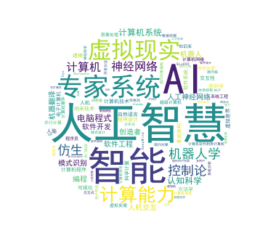

In [75]:
test()

# 获取某个单次对应的词向量

In [25]:
ss = models.Word2Vec.load("D:/AI/第4课/model/wiki_corpus.model")
ss['大象']

2019-07-31 17:57:20,931:INFO:loading Word2Vec object from D:/AI/第4课/model/wiki_corpus.model
2019-07-31 17:57:22,234:INFO:loading wv recursively from D:/AI/第4课/model/wiki_corpus.model.wv.* with mmap=None
2019-07-31 17:57:22,235:INFO:loading vectors from D:/AI/第4课/model/wiki_corpus.model.wv.vectors.npy with mmap=None
2019-07-31 17:57:22,528:INFO:setting ignored attribute vectors_norm to None
2019-07-31 17:57:22,529:INFO:loading vocabulary recursively from D:/AI/第4课/model/wiki_corpus.model.vocabulary.* with mmap=None
2019-07-31 17:57:22,529:INFO:loading trainables recursively from D:/AI/第4课/model/wiki_corpus.model.trainables.* with mmap=None
2019-07-31 17:57:22,529:INFO:loading syn1neg from D:/AI/第4课/model/wiki_corpus.model.trainables.syn1neg.npy with mmap=None
2019-07-31 17:57:22,842:INFO:setting ignored attribute cum_table to None
2019-07-31 17:57:22,843:INFO:loaded D:/AI/第4课/model/wiki_corpus.model
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 

array([ 0.92715037,  0.37340653,  0.7036365 , -1.0053872 ,  0.178802  ,
       -0.70325994, -0.22989012, -0.5972023 ,  0.7952115 ,  0.35076633,
        0.4717583 , -0.58666325, -0.82284343,  0.46206126, -0.18627585,
        0.65332615, -0.24379948,  0.7706841 ,  0.80552995, -0.31332815,
       -1.1175491 , -1.7366598 ,  1.3227059 , -0.13442394, -1.1407534 ,
       -0.26598984,  0.0930741 , -0.06712216, -1.2153015 ,  0.5320565 ,
        2.484655  ,  1.4416156 ,  0.22363117, -0.23027188,  0.6691169 ,
       -0.73985755, -0.55115795,  0.69387126,  1.7137287 ,  1.9085842 ,
        0.16799086, -0.17947552, -1.1842592 ,  1.1340004 ,  0.19082463,
       -0.48882124, -0.72009623, -0.83133554, -0.06480438,  0.0764263 ,
       -0.314567  ,  0.74851215, -1.3036588 ,  1.5294709 , -0.31337866,
        0.5087171 ,  0.5092004 ,  0.32408065,  0.27710614, -1.2052797 ,
        0.3899453 ,  0.3313894 ,  0.26940075, -0.29445854, -1.0105472 ,
        1.583133  , -0.03797611, -0.03000293,  2.41505   , -2.54

# 两个词的相似度

In [26]:
two_corpus = ["乌龟","鳖"]

In [27]:
ret = ss.similarity(two_corpus[0], two_corpus[1])

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [28]:
ret

0.5326433

#  如果是相同的单词，能不能认为是1？

In [29]:
other_corpus = ["百科","百科"]
res = ss.similarity(other_corpus[0],other_corpus[1])

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


In [30]:
res

0.99999994

#  词云

In [59]:
font = r'C:\Windows\Fonts\simhei.ttf'

In [60]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [61]:
cloud1 = {'中文':0.1,"英文":0.2,"C":0.3,"D":0.4,"E":0.5,"F":0.6,"G":0.7,"H":0.8,"I":0.9}

In [62]:
w1 = WordCloud(font_path=font, background_color="white")

In [63]:
w1.generate_from_frequencies(cloud1)

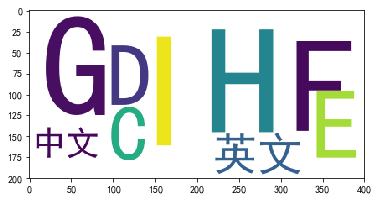

In [64]:
#plt.axis("off")
plt.imshow(w1)  # , interpolation="bilinear"
plt.show()

# 词云默认是不支持中文的，必须指定font中文字眼